# Student name: jorge blanco

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut


# Task 1a

These functions are provided to assist you in Task 1a

In [63]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [64]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [65]:
def extract_features(data) :
    """ Extract X and y from the data .  """

    X = data[:, :-1] # give me all thew columns except the last one
    y = data[:, -1]  # give me the last column

    return X, y

In [66]:
def add_features_data(data) :
    """ append to the grid 3 columns with new features - note: NP: syncs up the types so will end up seen 1.00000000e+00 """

    feature1 = data[:, 0] # get first column
    feature2 = data[:, 1] # get second column

    feature3 = feature1 * feature2
    feature1_power = feature1 ** 2
    feature2_power = feature2 ** 2

    feature3_column = feature3.reshape(-1, 1)
    feature1_power_column = feature1_power.reshape(-1, 1)
    feature2_power_column = feature2_power.reshape(-1, 1)

    data_with_new_column = np.insert(data, 2, feature3_column.T, axis=1)
    data_with_new_column = np.insert(data_with_new_column, 2+1, feature1_power_column.T, axis=1)
    data_with_new_column = np.insert(data_with_new_column, 2+2, feature2_power_column.T, axis=1)

    return data_with_new_column

In [67]:
def calculate_accuracy (y_test, y_pred) :
    """ This is a poor man version of the panda library call  """

    return np.mean(y_test == y_pred)

In [68]:
def read_data_file_X_y(filename):
    """ Read data from file and extract X, y """

    data = read_data_file(filename)

    X, y = extract_features(data)

    return X, y, data

In [69]:
def read_data_file_standarise_split_X_y(filename):
    """ Read data from file and split training and test """

    data = read_data_file(filename)

    X, y = extract_features(data)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [70]:
def read_training_data_X_y_add_new_feature_linear(filename):
    """ Get the X and y values from the training file """

    data = read_data_file(filename)

    data = add_features_data(data)

    X, y = extract_features(data)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [71]:
def get_training_data_X_y_add_new_feature_linear(data):
    """ Get the X and y values from the training file """

    data = add_features_data(data)

    X, y = extract_features(data)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, data

In [72]:
def read_data_file(filename):
    """ Read training data from file. """

    data = np.genfromtxt(filename, delimiter=',', skip_header=1)

    return data

In [73]:
def add_missing_columns(train_data, test_data) :
    """ There are cases when we are adding features to the training data and those columns need to be present in the test data set  """

    num_cols_train_data = train_data.shape[1]
    num_cols_test_data = test_data.shape[1]

    max_columns = max(num_cols_train_data, num_cols_test_data)

    missing_cols_number = max_columns - num_cols_test_data

    # populate the new columns as zero columns
    new_columns = np.zeros((test_data.shape[0], missing_cols_number))

    test_data_with_new_columns = np.insert(test_data, 2, new_columns.T, axis=1)

    return test_data_with_new_columns

In [74]:
#def print_feature_importances(model):
#    """ Print feature importances """

#    coefficients = model.coef_[0]
#    feature_importance = pd.Series(coefficients )
#    feature_importance.plot(kind='barh')
#    plt.title('Feature Importance')
#    plt.xlabel('Coefficient Value')
#    plt.ylabel('Feature')
#    plt.show()

In [75]:
#def correlation_matrix(training_data, title):
#    """ Render the correlation matrix """#

#    correlation_matrix = training_data.corr()
#    print(correlation_matrix['target'].sort_values(ascending=False))

#    plt.figure(figsize=(12, 8))
#    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#    plt.title(title)
#    plt.show()

In [76]:
#def compute_mutual_information_matrix(df):
#    mutual_info_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
#    for col1 in df.columns:
#        for col2 in df.columns:
#            if col1 == col2:
#                mutual_info_matrix.loc[col1, col2] = 1.0
#            else:
#                mutual_info = mutual_info_regression(df[[col1]], df[col2])
#                mutual_info_matrix.loc[col1, col2] = mutual_info[0]
#    return mutual_info_matrix

In [77]:
def plot_y_testing_y_predictions(y_test, y_pred):
    fig = plt.figure()

    testZone = fig.add_axes([0,0,1,1])
    testZone.plot(range(len(y_test)),y_test, 'b+')
    testZone.set_ylabel('y_test')
    predictedZone = testZone.twinx()
    predictedZone.plot(range(len(y_pred)), y_pred,'r+')
    predictedZone.set_ylabel('y_pred')

    fig.legend(labels = ('y_test','y_pred'),loc='upper right')
    plt.title("y_test vs y_pred values")
    plt.show()

In [78]:
def plot_feature1_feature2_as_circle(X_train, X_test, y_train, y_test):

    _, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

    train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

    train_ax.set_ylabel("Feature #1")
    train_ax.set_xlabel("Feature #0")
    train_ax.set_title("Training data")

    test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
    test_ax.set_xlabel("Feature #0")
    _ = test_ax.set_title("Testing data")
    plt.figure(figsize=(12, 6))
    plt.show()

Please add cells according to your own requirements.

In [79]:
# lets have a look and see if the features are linear or non-linear
# training_data = read_data_file('Et2_Classification_TrainingData.csv')
# correlation_matrix(training_data, "Correlation Matrix")
# correlation_matrix(compute_mutual_information_matrix(training_data), "Non-Linear Correlation Matrix")

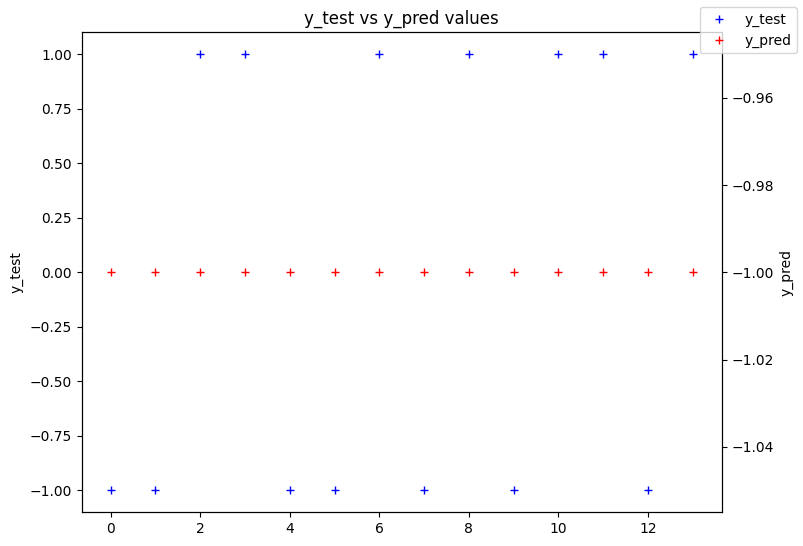

In-sample error: 0.5


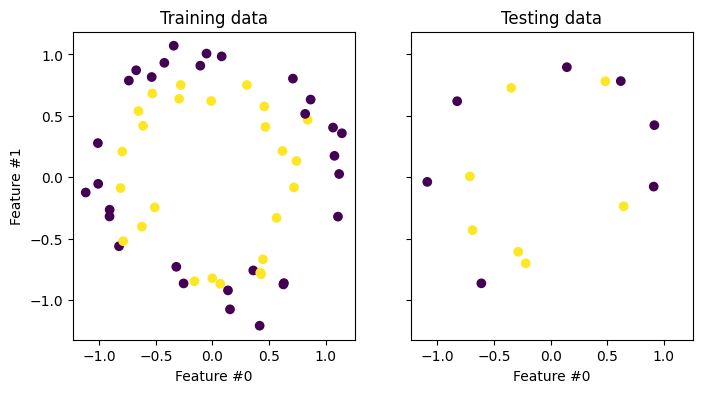

<Figure size 1200x600 with 0 Axes>

In [101]:
# train the model with training data and check the accuracy , also dump feature importance graph
X_train, X_test, y_train, y_test = read_data_file_standarise_split_X_y('Et2_Classification_TrainingData.csv')

# train the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(y_pred) # all -1
#print(y_test) # some are + 1 / -1

plot_y_testing_y_predictions(y_test, y_pred)

ein = calculate_accuracy(y_test, y_pred)
print(f"In-sample error: {ein}")

plot_feature1_feature2_as_circle(X_train, X_test, y_train, y_test)

Out-of_sample error: 0.4482758620689655


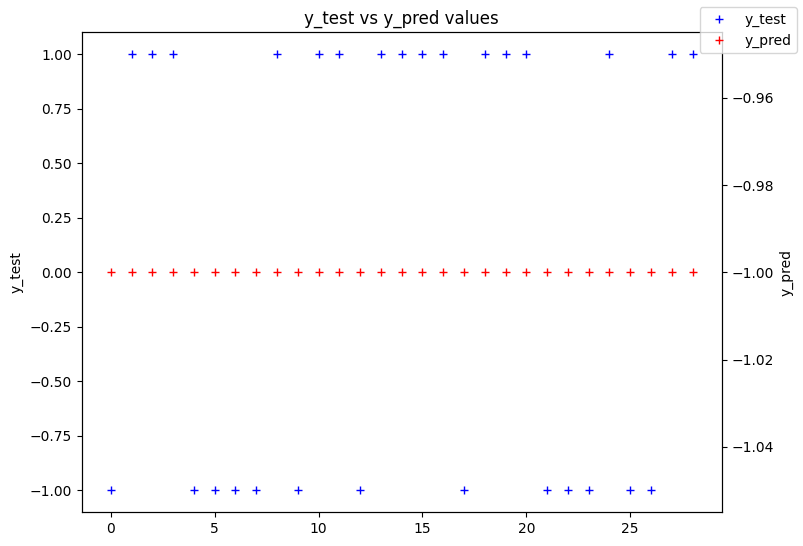

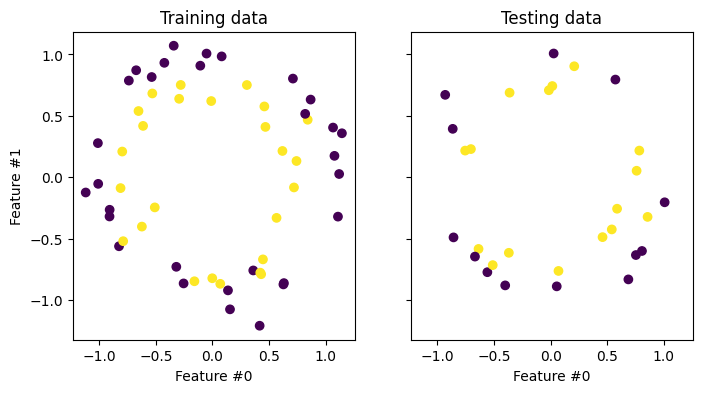

<Figure size 1200x600 with 0 Axes>

In [102]:
X_testdata, y_testdata, data = read_data_file_X_y('Et2_Classification_TestData.csv')

# test the model with test data
y_pred_testdata = model.predict(X_testdata)

eout = calculate_accuracy(y_testdata, y_pred_testdata)
print(f"Out-of_sample error: {eout}")

plot_y_testing_y_predictions(y_testdata, y_pred_testdata)
plot_feature1_feature2_as_circle(X_train, X_testdata, y_train, y_testdata)

Accuracy of the model 'Training Data' - Ein: 0.9285714285714286
Accuracy of the model 'Test Data'    - Eout: 0.5517241379310345


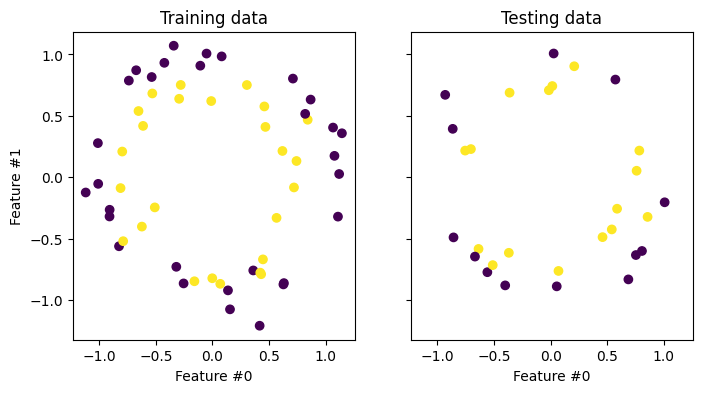

<Figure size 1200x600 with 0 Axes>

In [103]:
data_trainingdata = read_data_file('Et2_Classification_TrainingData.csv')
X_train, X_test, y_train, y_test, data = get_training_data_X_y_add_new_feature_linear(data_trainingdata)

# train the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ein_with_feature = calculate_accuracy(y_test, y_pred)

print(f"Accuracy of the model 'Training Data' - Ein: {ein_with_feature}")

# ----------------- [ test the model with test data] ------------------------ #

data_testdata = add_missing_columns(data, read_data_file('Et2_Classification_TestData.csv'))

X_testdata, y_testdata = extract_features(data_testdata)

y_pred_testdata = model.predict(X_testdata)

eout_with_feature = calculate_accuracy(y_testdata, y_pred_testdata)

print(f"Accuracy of the model 'Test Data'    - Eout: {eout_with_feature}")

plot_feature1_feature2_as_circle(X_train, X_testdata, y_train, y_testdata)


## Reflection

After engaging with your peers, reflect on this task and answer the following questions: 
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

1) Ein and Eout perform poorly with the model when using the existing features, clearly the model is underfitting . When new features are introduced we end up overfitting, the model is able to capture well the data during training , but still not able to capture data during testing.
2) Complex data points are not always linearly separable, by adding a transformation we are shifting the data in to a dimension higher than 2 , that way we are able to draw the boundary as a circle or non-linear line.
3) By adding more features to the model we are increasing the complexity , however we are running the risk of memorising the training data well and performing poorly with test data

# Task 1b

In [83]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [84]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [85]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [86]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

In [87]:
def extract_features_1b(data) :
    '''Extract X, y from data  '''

    X = data[:, 0] # give me all thew columns except the last one
    y = data[:, -1]
    return X, y

In [359]:
def plot_Ein_Eout_vs_powers(power_range, error_in, error_out):

    plt.figure(figsize=(12,8))
    plt.title("Ein vs Eout over polynomial degree")

    error_in_std = np.std(error_in)
    error_out_std = np.std(error_out)

    plt.grid()

    plt.fill_between(power_range, error_in - error_in_std, error_in + error_in_std, alpha=0.1, color="r")
    plt.fill_between(power_range, error_out - error_out_std, error_out + error_out_std, alpha=0.1, color="g")

    plt.plot(power_range, error_in, 'o-', color="r", label="Ein")
    plt.plot(power_range, error_out, 'o-', color="g",label="Eout")
    plt.xlabel('Power')
    plt.ylabel('Error')

    min_diff, (index_in, index_out) = min((abs(value_in - value_out), (index_in, index_out)) for index_in, value_in in enumerate(error_in) for index_out, value_out in enumerate(error_out))
    print(f"The best polynomial degree is {power_range[index_in]} with [Ein-Eout] closest: {min_diff}")

    plt.legend()
    plt.show()

In [110]:
def plot_initial_data(X, y) :
    plt.figure()
    plt.scatter(X, y, label='Regression Data points')
    plt.title('File Data Visualisation')
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

The best polynomial degree is 6 with [Ein-Eout] closest: 0.00818617520299355


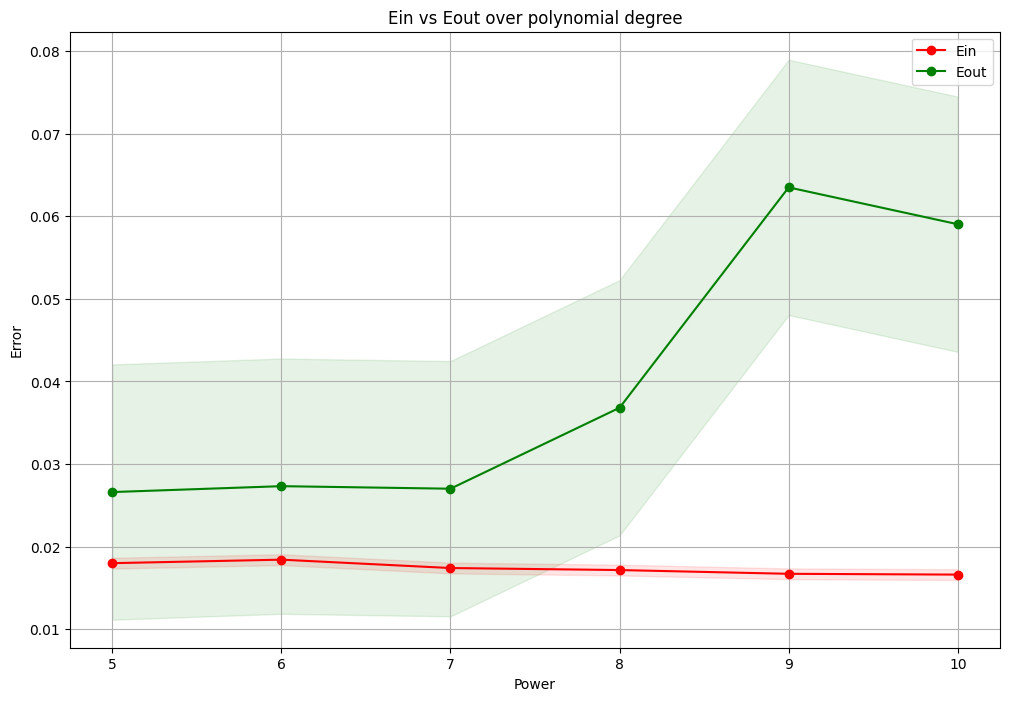

In [362]:
error_in = []
error_out = []
repeats = 100
low_powers = 5
high_powers = 11
power_range = range(low_powers, high_powers) # it is up to you to decide on a suitable range

# read the data and extract X, y
regression_data = read_data_file('ET2_Regression_Data.csv')
X, y = extract_features_1b(regression_data)

for i, power in enumerate(power_range, 1):
    e_in=0
    e_out=0
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

        X_train_trans = transPoly(X_train ,power)
        X_test_trans = transPoly(X_test ,power)

        w = weights(X_train_trans,y_train)

        e_in += calc_error(w, X_train_trans, y_train)
        e_out+= calc_error(w, X_test_trans, y_test)

    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

plot_Ein_Eout_vs_powers(list(power_range), error_in, error_out)

Please add cells according to your own requirements.

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity? 

As the degree of the polynomial increases the more intricate patterns in the data the model can detect increases , those the model becomes more complex.
From the get-go Eout and Ein deviate and the VC dimension increases with the polynomial power. That is why power 5 is the best degree and the 8/9th degree are the breaking point of the model with the sharp deviation. I went for a training set of .5 , by trial and error, anything below or above lead to a big gap between Ein and Eout

# Task 2

Below is an implementation of linear regression with regularization

In [91]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [363]:
def execute_linear_regression(X_trans, y, lambdas) :
    ''' This code was provided I just pushed it to a function '''

    ein=[]
    eout=[]
    weights=[]

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
    for l in lambdas:
        w = weights_reg(X_train,y_train,l)

        ein.append(calc_error(w, X_train, y_train))
        eout.append(calc_error(w, X_test, y_test))

        weights.append(w)

    return weights, ein, eout, X_train, y_train

In [93]:
def plot_lambdas_vs_eout(lambdas, eout) :
    plt.plot(lambdas,eout)
    plt.show()

In [94]:
def get_best_values_eout_w_lambda(X, y, weights, eout, lambdas):
    ''' Get the best value for weights Eout and lambda '''

    best_value_index = np.argmin(eout)

    best_value_weight = weights[best_value_index]
    best_value_lambda = lambdas[best_value_index]

    return best_value_weight, calc_error(best_value_weight, X, y), best_value_lambda

In [302]:
def get_worst_lambda(eout, lambdas):
    ''' Get the worst value for lambda - which is the max value '''

    worst_value_index = np.argmax(eout)

    worst_value_lambda = lambdas[worst_value_index]

    return worst_value_lambda

In [347]:
def plot_results_after_regularisation(lambdas, ein, eout, best_value_lambda) :
    plt.figure(figsize=(10, 6))
    plt.title(f"Ein vs Eout over Lambdas")

    plt.xscale("log") # make the Lambdas look sexy :)

    plt.plot(lambdas, ein, "-g", label="Ein")
    plt.plot(lambdas, eout, "-r", label="Eout")

    # this is to mark the best point on the graph for Eout
    # since using "log" the value may not reflect graph data
    plt.axvline(x=best_value_lambda, color='r', linestyle='--', label=f'Best Lambda: {best_value_lambda}')

    plt.ylabel("Error")
    plt.xlabel("Lambdas (λ)")

    plt.legend()
    plt.show()

In [305]:
def plot_overfitted_optimal_underfitted_model(X_original, y_original, X_train, y_train, lambdas, labels) :
    ''' This is the code used to render the 3 graphs '''

    # setup the canvas for 3 graphs
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

    # transpoly the original X
    X_original_trans = transPoly(X_original, 50)

    # generate a bias column of the same size as the inpout with 1 values
    ones_column = np.ones((X_original_trans.shape[0], 1))

    # concat the bias to the trans input matrix so that the 1st column is of the 1 column
    X_original_trans_with_bias = np.concatenate((ones_column, X_original_trans), axis=1)

    for index, lambda_value in enumerate(lambdas):
        # plot the original X and y values
        axs[index].scatter(X_original, y_original, color="green", label="input data")

        # calculate the weights
        weight = weights_reg(X_train, y_train, lambda_value)

        # plot the original X values vs the y_predict (it is a dot product of the X with bias and the weight)
        # we are rendering the dots and
        axs[index].plot(X_original, X_original_trans_with_bias.dot(weight), 'o', markersize=3, color="red", label=f"hypothesis with l: {lambda_value:0.6f}")

        # set the label of each sub graph
        axs[index].set_title(labels[index])
        axs[index].legend()

    # share the x and y labels
    fig.text(0.5, 0, 'Lambdas (λ)', ha='center')
    fig.text(0, 0.5, 'Error', va='center', rotation='vertical')

    plt.tight_layout()
    plt.show()

In [96]:
#def plot_weights_with_and_without_regularisation(weights_regularised,weights_unregularised) :
    # Create the histogram
#    plt.hist(weights_regularised, bins=100, alpha=0.5, label='regularised weights', edgecolor='green')
#    plt.hist(weights_unregularised, bins=100, alpha=0.5, label='un-regularised weights',edgecolor='red')

    # Add titles and labels
#    plt.title('Histogram of Two Weights')
#    plt.legend(loc='upper right')

    # Show the plot
#    plt.show()

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

In [97]:
#ein=[]
#eout=[]
#weights=[]
#lambdas = np.logspace(-4, 4, 1000)

#X_trans = transPoly(X,50)

# random_state fixed to get reproducible (and 'good'! :-)) results
#X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
#for l in lambdas:
#    w = weights_reg(X_train,y_train,l)
    
#    ein.append(calc_error(w,X_train,y_train))
#    eout.append(calc_error(w,X_test,y_test))

#    weights.append(w)
    
#plt.plot(lambdas,eout)
#plt.show()

Please add cells according to your own requirements.

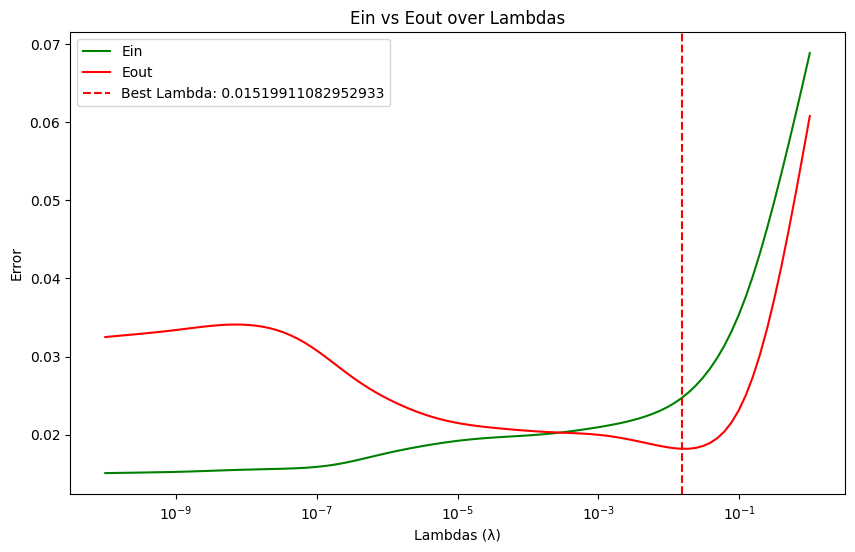

Regularised E_out with data split 80 / 20: 0.031 


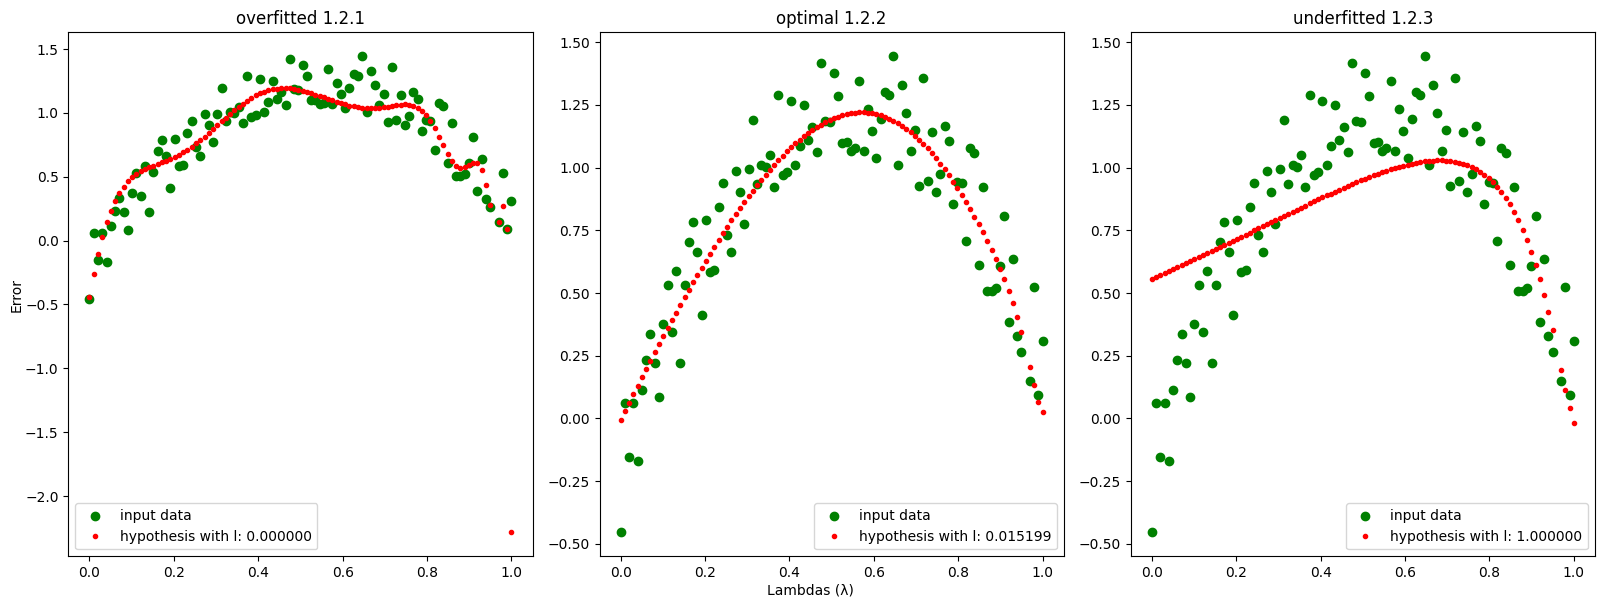

In [348]:
regression_data = read_data_file('ET2_Regression_Data.csv')
X_original, y_original = extract_features_1b(regression_data)

# split the input into train and test ( 80 / 20 )
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, train_size=0.8, random_state =5)

# run the regularised version
lambdas = np.logspace(-10, 0, 100) # set up lambdas to be -10 to 0

# execute the linear regression logic provided
weights_regularised, ein_regularised, eout_regularised, X_train, y_train = execute_linear_regression(transPoly(X_train, 50), y_train, lambdas)

# get the lest eout value and lambda
_, best_eout_regularised, best_lambda_regularised = get_best_values_eout_w_lambda(transPoly(X_test, 50), y_test, weights_regularised, eout_regularised, lambdas)

plot_results_after_regularisation(lambdas, ein_regularised, eout_regularised, best_lambda_regularised)

# run the un-regularised version
# the lambdas above has zero so we are running the un-regulated version with the regularised code

# print results
print(f"Regularised E_out with data split 80 / 20: {best_eout_regularised:0.3f} ")

plot_overfitted_optimal_underfitted_model(X_original, y_original, X_train, y_train, [lambdas[0], best_lambda_regularised, get_worst_lambda(eout_regularised, lambdas)], ["overfitted 1.2.1", "optimal 1.2.2", "underfitted 1.2.3"])


## Reflection

In your reflection, makes sure to answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

------------------

- 1.1 The best point on Eout is at the lowest valley (dotted line) , as the Lambda get close to zero the graph is overfitted , as it gets close the 1 it is underfitted. There is a slight increase close to 0 , that implies the model was able to learn from the data.
- 1.2 Image 1.2.1 is very sensitive to noise (it has memorised the training data well),
    - Image 1.2.2 - there is a clear valance between the edges, and it is able to capture the curve of the points,
    - Image 1.2.3 - just way off , look completely random, doesn't capture the shape of the points .
2) There was no strategy trial and error, the input is separated in to 80 / 20 ( standard data split rule ). Lambdas range was selected by playing with values  "played with 100 and 1000 points - stayed with 100"
3) The expression basically shifts the eigenvalue of (np.identity(m.shape[0])) by l, this helps the model to be more robust (we dont want any small changes in the input data to offset the final result), particularly when the data is noise. It also helps to prevent overfitting and helps the model "m" to be more stable for inversion (some matrix don't have an invert or small changes in th einput lead to big data modifications)

# Task 3

Please add cells according to your own requirements.

Regularised E_out with KFold 1: 0.110 
Regularised E_out with KFold 2: 0.029 
Regularised E_out with KFold 3: 0.019 
Regularised E_out with KFold 4: 0.036 
Regularised E_out with KFold 5: 0.028 
Regularised E_out with KFold 6: 0.018 
Regularised E_out with KFold 7: 0.021 
Regularised E_out with KFold 8: 0.158 
Regularised E_out with KFold 9: 0.030 
Regularised E_out with KFold 10: 0.045 
Best E_out: 0.018 


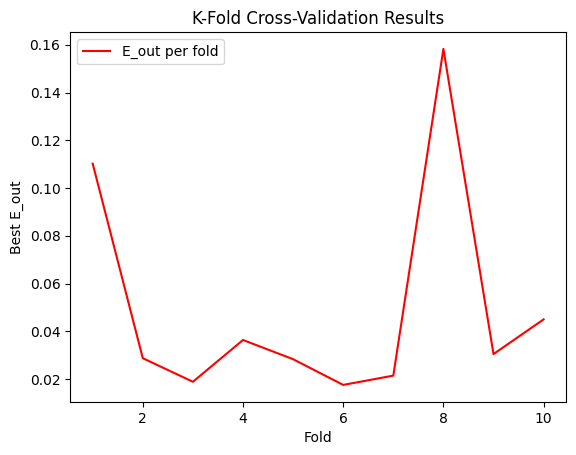

In [358]:
regression_data = read_data_file('ET2_Regression_Data.csv')
X_original, y_original = extract_features_1b(regression_data)

# n_splits     - is what we are looking for
# shuffle      - start the split with data shuffle
# random_state - seed used for the random number generator (makes zero diff just like to remind myself 'the answer to life')
kf = KFold(n_splits=10, shuffle=True, random_state=42)

best_eout = []
fold = 1
for train_index, test_index in kf.split(X_original):
    X_train, X_test = X_original[train_index], X_original[test_index]
    y_train, y_test = y_original[train_index], y_original[test_index]

    X_trans = transPoly(X_train, 50)
    X_test_trans = transPoly(X_test, 50)

    # run the regularised version
    # because we have zero in out lambdas that is like having un-regularised value
    lambdas = np.logspace(-10, 0, 100)
    weights_regularised, ein_regularised, eout_regularised, _, _ = execute_linear_regression(X_trans, y_train, lambdas)
    best_weight_regularised, best_eout_regularised, best_lambda_regularised = get_best_values_eout_w_lambda(X_test_trans, y_test, weights_regularised, eout_regularised, lambdas)

    # append the result of Eout - so that after I can take the best value
    print(f"Regularised E_out with KFold {fold}: {best_eout_regularised:0.3f} ")
    best_eout.append(best_eout_regularised)

    fold += 1

print(f"Best E_out: {min(best_eout):0.3f} ")

plt.plot(np.arange(1, 10 + 1), best_eout,  linestyle='-', color='r', label='E_out per fold')
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Best E_out')
plt.legend()
plt.show()


## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters. 

## Reflection

1) There was little feed back provided by the peers , except for "Aryan Singh" who pointed out my initial graphs for task 1 was incorrect as I was not representing the data in a circle. I left the original 1d and rendered the data in a circle. Also, I used th e panda library heavily, so some of the methods present are util methods as I had to migrate the code not to use the panda library.

##Summarise your understanding of:

1) the relationship between feature transformations and model complexity.
2) how regularisation impacts the complexity of a model.
3) how complexity impacts the data requirements to successfully train a machine learning model.

When we add features, we are adding complexity to the model. In some cases the extra feature can be used to extract complex data patterns or make the relationship between the features and the target variable more interpretable or make it run faster. But it doesn't always result in an improvement. In some cases the extra features can leave to poor performance on real data with overfitting, that is why it is imperative when a new feature is added we must validate the result before and after.

Regularisation is a technique used to prevent overfitting, by penalising complexity and at the same time it can be used to remove redundant features and make the model run faster. Another advantage of regularisation it makes the model less likely to overfit. Height regularisation increases the penalty, while low regularisation leeds to a more complex model.

Complex models require a lot of data to capture patterns. However, during the training process, models can memorise the data too well, which leeds to poor performance with unseen data. So we need a balance between too much data and the right amount of data. Lack of data can also lead to issues, as we don't learn all the data patterns and data must always be a representation of the problem space.

